In [2]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [3]:
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, multilabel_confusion_matrix
from sklearn.model_selection import train_test_split

In [4]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from tqdm import tqdm

In [5]:
import requests
import os
from pathlib import Path

In [6]:
from warnings import filterwarnings
filterwarnings('ignore')

In [7]:
main_path = Path('scl90')

if main_path.is_dir():
  print('Skipping creating the folder, already exists')
else:
  main_path.mkdir(parents=True, exist_ok=True)
  print(f'Creating folder {main_path}...')

data_paths= [
    'https://raw.githubusercontent.com/garvpatidar04/scl_90_data/main/scl_ctgan.csv',
    'https://raw.githubusercontent.com/garvpatidar04/scl_90_data/main/first_ctgan_scl.csv',
    'https://raw.githubusercontent.com/garvpatidar04/scl_90_data/main/second_ctgan_scl.csv',
    'https://raw.githubusercontent.com/garvpatidar04/scl_90_data/main/third_ctgan_scl.csv'
]



for i,d in enumerate(data_paths):
  with open(main_path/f'scl_{i+1}.csv', 'wb') as f:
    rq = requests.get(d)
    f.write(rq.content)
    print(f'writing {i+1} data to you local environment...')

Creating folder scl90...
writing 1 data to you local environment...
writing 2 data to you local environment...
writing 3 data to you local environment...
writing 4 data to you local environment...


In [8]:
data1 = pd.read_csv(main_path/'scl_1.csv')
data2 = pd.read_csv(main_path/'scl_2.csv')
data3 = pd.read_csv(main_path/'scl_3.csv')
data4 = pd.read_csv(main_path/'scl_4.csv')

#**Checking for best dataset among above four**

In [ ]:
data4.head()

,SCL01,SCL02,SCL03,SCL04,SCL05,SCL06,SCL07,SCL08,SCL09,SCL10,...,som,ocd,ips,dep,anx,ah,panx,pi,p,add
0,3.0,1.0,0.0,4.0,0.0,2.0,0.0,0.0,3.0,2.0,...,0,0,0,0,0,0,0,0,0,0
1,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,...,0,0,0,0,0,0,0,0,0,0
2,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,3.0,1.0,...,0,0,0,0,0,0,0,0,0,0
3,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,1.0,0.0,2.0,1.0,2.0,3.0,0.0,0.0,4.0,3.0,...,0,1,0,0,0,0,0,0,0,0


In [ ]:
data4.iloc[:,-10:].sum(axis=1).value_counts()

0     29793
1      4710
2      2809
3      2148
4      1839
8      1697
5      1696
6      1692
7      1568
9      1461
10      587
Name: count, dtype: int64

In [ ]:
data1.shape, data2.shape, data3.shape

((50000, 100), (50000, 100), (50000, 100))

In [ ]:
def result_d(model, X, y, X_val, y_val,i):
    model.fit(X,y)

    y_pred = model.predict(X_val)

    acc = accuracy_score(y_val, y_pred)

    print(f'Model Accuracy of data{i+1} is {acc}\n')
    return np.round( (acc*100), 3)

In [ ]:
for i,d in enumerate([data1,data2,data3]):
  result = result_d(
  MultiOutputClassifier( XGBClassifier() ),
  d.iloc[:,:-10].head(40000),
  d.iloc[:,-10:].head(40000),
  d.iloc[:,:-10].tail(10000),
  d.iloc[:,-10:].tail(10000),
  i
  )

Model Accuracy of data1 is 0.9032

Model Accuracy of data2 is 0.8957

Model Accuracy of data3 is 0.907



In [ ]:
model = MultiOutputClassifier( XGBClassifier() )

model.fit( data1.iloc[:,:-10].sample(30000, random_state=23), data1.iloc[:,-10:].sample(30000, random_state=23) )

y_val = data1.iloc[:,-10:].sample(1000, random_state=24)
y_pred = model.predict(data1.iloc[:,:-10].sample(1000, random_state=24))

acc = accuracy_score(y_val, y_pred)

print(acc)

0.959


In [ ]:
model = MultiOutputClassifier( XGBClassifier() )

model.fit( data2.iloc[:,:-10].sample(30000, random_state=23), data2.iloc[:,-10:].sample(30000, random_state=23) )

y_val = data2.iloc[:,-10:].sample(1000, random_state=24)
y_pred = model.predict(data2.iloc[:,:-10].sample(1000, random_state=24))

acc = accuracy_score(y_val, y_pred)

print(acc)

0.956


In [ ]:
model = MultiOutputClassifier( XGBClassifier() )

model.fit( data3.iloc[:,:-10].sample(30000, random_state=23), data3.iloc[:,-10:].sample(30000, random_state=23) )

y_val = data3.iloc[:,-10:].sample(1000, random_state=24)
y_pred = model.predict(data3.iloc[:,:-10].sample(1000, random_state=24))

acc = accuracy_score(y_val, y_pred)

print(acc)

0.959


In [ ]:
model = MultiOutputClassifier( LogisticRegression() )

model.fit( data3.iloc[:,:-10].sample(30000, random_state=23), data3.iloc[:,-10:].sample(30000, random_state=23) )

y_val = data3.iloc[:,-10:].sample(1000, random_state=24)
y_pred = model.predict(data3.iloc[:,:-10].sample(1000, random_state=24))

acc = accuracy_score(y_val, y_pred)

print(acc)

1.0


### Let's use data3

In [34]:
def result(model, X, y, X_val, y_val, f):
    X, X_val = X.iloc[:,:f], X_val.iloc[:,:f]

    model.fit(X,y)

    y_pred = model.predict(X_val)

    acc = accuracy_score(y_val, y_pred)

#     print(f'Model Accuracy with {f} columns out of 90 is {acc}')

    return np.round( (acc*100), 3)

In [ ]:
result_model1 = {}
for i in tqdm(range(1,91)):
    result_score1 = result(
    MultiOutputClassifier(LogisticRegression()),
    data3.iloc[:,:-10].sample(30000, random_state=23),
    data3.iloc[:,-10:].sample(30000, random_state=23),
    data3.iloc[:,:-10].sample(10000, random_state=24),
    data3.iloc[:,-10:].sample(10000, random_state=24),
    i
    )

    result_model1[f'{i}_num_col'] = result_score1

100%|██████████| 90/90 [04:36<00:00,  3.07s/it]


In [ ]:
result_log1 = pd.DataFrame(
    result_model1.values(),
    index=result_model1.keys(),
    columns = ['accuracy_score']
).reset_index()

index = result_log1['index']
result_log1['col_num'] = index
result_log1.drop(columns=['index'], axis=1, inplace=True)

result_log1.head()

,accuracy_score,col_num
0,2.93,1_num_col
1,7.33,2_num_col
2,12.39,3_num_col
3,13.61,4_num_col
4,14.81,5_num_col


100.0


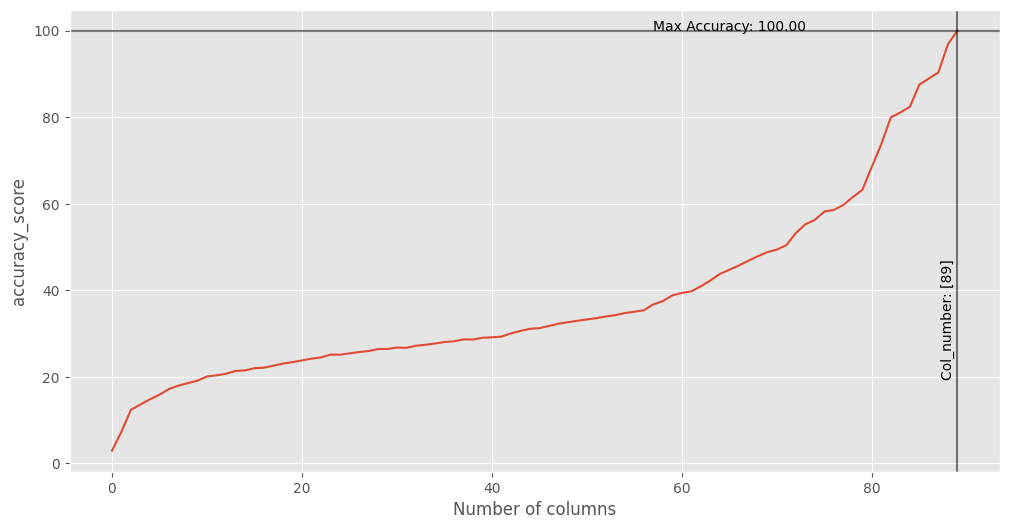

In [ ]:
plt.figure(figsize=(12,6))

sns.lineplot(result_log1['accuracy_score'])

max_acc = result_log1['accuracy_score'].max()
avg = result_log1['accuracy_score'].mean()
a = result_log1[result_log1['accuracy_score']==result_log1['accuracy_score'].max()].index

plt.axhline(y = max_acc, c='black', alpha=0.5)
plt.axvline(x = a, c='black', alpha=0.5)


plt.annotate(f'Max Accuracy: {max_acc:.2f}',
             xy=(len(result_log1['accuracy_score']) - 25, max_acc),
             xytext=(len(result_log1['accuracy_score']) - 25, max_acc + 0.02),
             ha='center')

plt.annotate(f'Col_number: {a.values}',
             xy=(len(result_log1['accuracy_score']) - 1, max_acc),
             xytext=(len(result_log1['accuracy_score'])-2, max_acc - 80),
             ha='center', rotation=90)


print(max_acc)
plt.xlabel('Number of columns')
plt.show()

Index([89], dtype='int64')

In [ ]:
result_model2 = {}
for i in tqdm(range(1,91)):
    result_score2 = result(
    MultiOutputClassifier(XGBClassifier()),
    data3.iloc[:,:-10].sample(30000, random_state=23),
    data3.iloc[:,-10:].sample(30000, random_state=23),
    data3.iloc[:,:-10].sample(10000, random_state=24),
    data3.iloc[:,-10:].sample(10000, random_state=24),
    i
    )

    result_model2[f'{i}_num_col'] = result_score2

100%|██████████| 90/90 [14:22<00:00,  9.58s/it]


In [ ]:
result_log2 = pd.DataFrame(
    result_model2.values(),
    index=result_model2.keys(),
    columns = ['accuracy_score']
).reset_index()

index = result_log2['index']
result_log2['col_num'] = index
result_log2.drop(columns=['index'], axis=1, inplace=True)

result_log2.head()

,accuracy_score,col_num
0,3.93,1_num_col
1,10.35,2_num_col
2,13.15,3_num_col
3,14.02,4_num_col
4,16.02,5_num_col


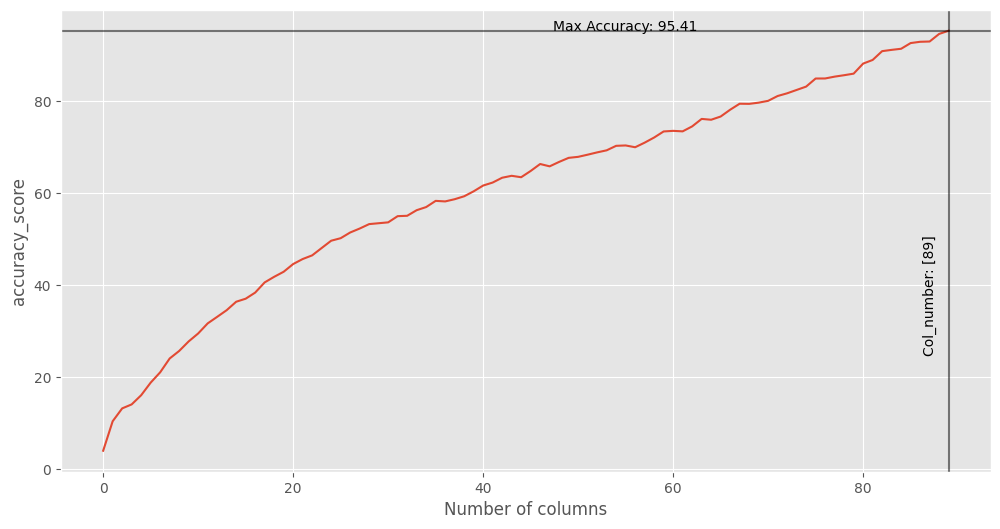

In [ ]:
plt.figure(figsize=(12,6))

sns.lineplot(result_log2['accuracy_score'])

max_acc = result_log2['accuracy_score'].max()
a = result_log2[result_log2['accuracy_score']==result_log2['accuracy_score'].max()].index

plt.axhline(y = max_acc, c='black', alpha=0.5)
plt.axvline(x = a, c='black', alpha=0.5)

plt.annotate(f'Max Accuracy: {max_acc:.2f}',
             xy=(len(result_log2['accuracy_score']) - 25, max_acc),
             xytext=(len(result_log2['accuracy_score']) - 35, max_acc + 0.02),
             ha='center')

plt.annotate(f'Col_number: {a.values}',
             xy=(len(result_log2['accuracy_score']) - 1, max_acc),
             xytext=(len(result_log2['accuracy_score']) - 3, max_acc - 70),
             ha='center', rotation=90)

plt.xlabel('Number of columns')
plt.show()

In [ ]:
try:
  import ipyvolume as ipv
except:
  !pip install ipyvolume -q
  import ipyvolume as ipv
  !jupyter nbextension enable --py --sys-prefix ipyvolume

In [ ]:
def visualize_2d(x, labels):
    sns.scatterplot(x=x[:, 0], y=x[:, 1], hue=labels, s=100, alpha=0.8,
                    palette="Greens", edgecolor="black")

def visualize_3d(x, labels):
    # Workaround as axis limits are not auto-scaling
    x_norm = (x - x.min(axis=0)) / (x.max(axis=0) - x.min(axis=0))
    fig = ipv.figure(height=400, width=400)
    x, y, z = x_norm[:, 0], x_norm[:, 1], x_norm[:, 2]

    # Colors
    cmap = plt.get_cmap('Greens', 3)
    color = cmap(labels)
    ipv.scatter(x, y, z, size=2, marker="sphere", color=color)
    ipv.show()

In [ ]:
try:
  import umap.umap_ as umap
except:
  !pip install umap-learn -q
  import umap.umap_ as umap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 838.8 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 2.9 MB/s eta 0:00:00


In [ ]:
reducer = umap.UMAP(n_components=3, n_neighbors=15, min_dist=0.1, metric='euclidean')
%time umap_3d = reducer.fit_transform(data3.iloc[:,:-10])
visualize_3d(umap_3d, data3.iloc[:,-10:])

CPU times: user 1min 23s, sys: 1.87 s, total: 1min 25s
Wall time: 54.3 s


Html(layout=None, style_='display: none', tag='span')

In [ ]:
visualize_3d(umap_3d, data3.iloc[:,-10:].sum(axis=1))

Html(layout=None, style_='display: none', tag='span')

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

CPU times: user 1min 18s, sys: 1.49 s, total: 1min 20s
Wall time: 1min


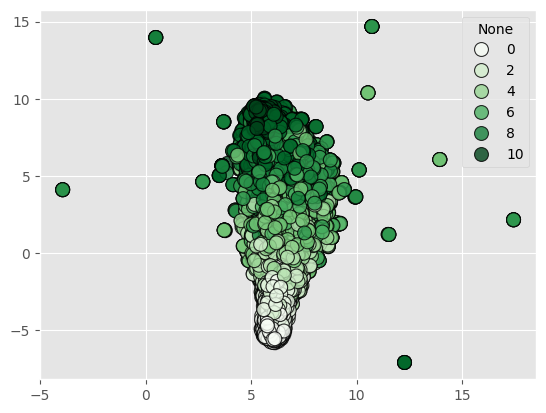

In [ ]:
reducer = reducer = umap.UMAP(n_components=2, n_neighbors=15, min_dist=0.1, metric='euclidean')
%time umap_2d = reducer.fit_transform(data3.iloc[:,:-10])
visualize_2d(umap_2d, data3.iloc[:,-10:].sum(axis=1))

## Truncated SVD

In [17]:
from sklearn.decomposition import TruncatedSVD

In [29]:
tsvd = TruncatedSVD(n_components=90, random_state=24)

In [32]:
data4_pca = tsvd.fit_transform(data4.iloc[:,:-10])
data4_pca = pd.DataFrame(data4_pca, columns=data4.iloc[:,:-10].columns[:90])

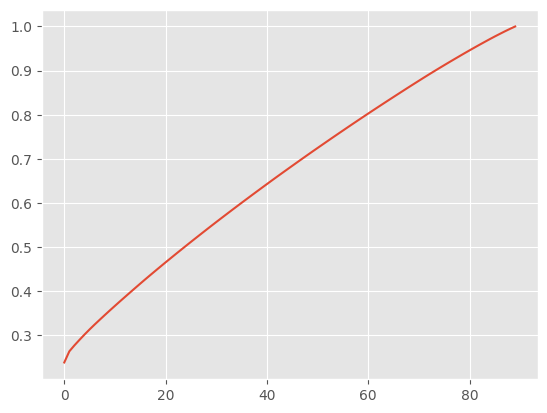

In [31]:
plt.plot(np.cumsum(tsvd.explained_variance_ratio_))

In [ ]:
result_model3 = {}
for i in tqdm(range(1,91)):
    result_score3 = result(
    MultiOutputClassifier(XGBClassifier()),
    data4_pca.iloc[:,:-10].sample(30000, random_state=23),
    data4.iloc[:,-10:].sample(30000, random_state=23),
    data4_pca.iloc[:,:-10].sample(10000, random_state=24),
    data4.iloc[:,-10:].sample(10000, random_state=24),
    i
    )

    result_model3[f'{i}_num_col'] = result_score3

 59%|█████▉    | 53/90 [16:40<24:19, 39.46s/it]

In [ ]:
result_log3 = pd.DataFrame(
    result_model3.values(),
    index=result_model3.keys(),
    columns = ['accuracy_score']
).reset_index()

index = result_log3['index']
result_log3['col_num'] = index
result_log3.drop(columns=['index'], axis=1, inplace=True)

result_log3.head()

# LDA

In [14]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Reshape, Dense, Lambda, Flatten
from tensorflow.keras.losses import MeanSquaredError

In [15]:
class Autoencoder(Model):
  def __init__(self, latent_dim=10):
    super(Autoencoder, self).__init__()
    self.latent_dim = latent_dim
    self.encoder = tf.keras.Sequential([
        Dense(latent_dim, activation='linear'),
    ])
    self.decoder = tf.keras.Sequential([
        Dense(4500000, activation='linear')
    ])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

In [16]:
autoencoder = Autoencoder(50)
autoencoder.compile(optimizer='adam', loss=MeanSquaredError())
autoencoder.fit(data4.iloc[:,:-10], data4.iloc[:,:-10], epochs=5)

Epoch 1/5


InvalidArgumentError: Graph execution error:

Detected at node gradient_tape/mean_squared_error/BroadcastGradientArgs defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py", line 37, in <module>

  File "/usr/local/lib/python3.10/dist-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelapp.py", line 619, in start

  File "/usr/local/lib/python3.10/dist-packages/tornado/platform/asyncio.py", line 195, in start

  File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever

  File "/usr/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once

  File "/usr/lib/python3.10/asyncio/events.py", line 80, in _run

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 685, in <lambda>

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 738, in _run_callback

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 825, in inner

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 786, in run

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 361, in process_one

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 261, in dispatch_shell

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 539, in execute_request

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py", line 302, in do_execute

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/zmqshell.py", line 539, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2975, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3030, in _run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3257, in run_cell_async

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code

  File "<ipython-input-16-e0eb7cb02a2f>", line 3, in <cell line: 3>

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1807, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1154, in train_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/optimizer.py", line 543, in minimize

  File "/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/optimizer.py", line 276, in compute_gradients

Incompatible shapes: [32,50000,90] vs. [32,90]
	 [[{{node gradient_tape/mean_squared_error/BroadcastGradientArgs}}]] [Op:__inference_train_function_811]